In [2]:
import pandas as pd

# Load the dataset
file_path = 'cookie_cats.csv'
cookie_cats_data = pd.read_csv(file_path)

# Display basic information about the dataset and the first few rows
cookie_cats_data.info()
cookie_cats_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


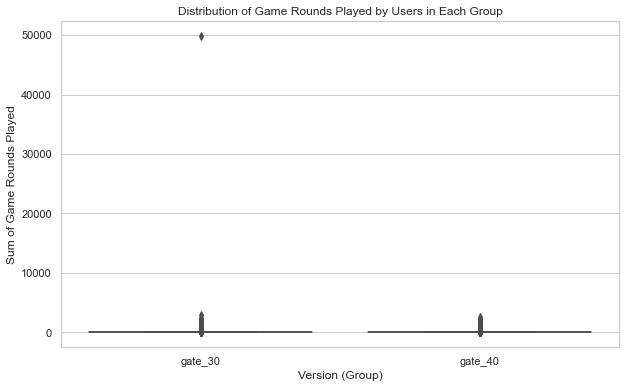

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a boxplot to visualize the distribution of sum_gamerounds for both versions
plt.figure(figsize=(10, 6))
sns.boxplot(x="version", y="sum_gamerounds", data=cookie_cats_data)
plt.title('Distribution of Game Rounds Played by Users in Each Group')
plt.xlabel('Version (Group)')
plt.ylabel('Sum of Game Rounds Played')
plt.show()

# Calculate descriptive statistics for sum_gamerounds in both groups
descriptive_stats = cookie_cats_data.groupby('version')['sum_gamerounds'].describe()
descriptive_stats


In [4]:
from scipy.stats import mannwhitneyu

# Extract sum_gamerounds for both groups
gate_30_gamerounds = cookie_cats_data[cookie_cats_data['version'] == 'gate_30']['sum_gamerounds']
gate_40_gamerounds = cookie_cats_data[cookie_cats_data['version'] == 'gate_40']['sum_gamerounds']

# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(gate_30_gamerounds, gate_40_gamerounds, alternative='two-sided')

# Display the p-value
p_value


0.05020880772044255

In [5]:
from scipy.stats import chi2_contingency

# Calculate 1-day retention rate for both groups
retention_1_gate_30 = cookie_cats_data[cookie_cats_data['version'] == 'gate_30']['retention_1'].mean()
retention_1_gate_40 = cookie_cats_data[cookie_cats_data['version'] == 'gate_40']['retention_1'].mean()

# Calculate 7-day retention rate for both groups
retention_7_gate_30 = cookie_cats_data[cookie_cats_data['version'] == 'gate_30']['retention_7'].mean()
retention_7_gate_40 = cookie_cats_data[cookie_cats_data['version'] == 'gate_40']['retention_7'].mean()

# Perform Chi-squared test for 1-day retention
contingency_table_1 = pd.crosstab(cookie_cats_data['version'], cookie_cats_data['retention_1'])
chi2_stat_1, p_value_1, _, _ = chi2_contingency(contingency_table_1)

# Perform Chi-squared test for 7-day retention
contingency_table_7 = pd.crosstab(cookie_cats_data['version'], cookie_cats_data['retention_7'])
chi2_stat_7, p_value_7, _, _ = chi2_contingency(contingency_table_7)

# Display retention rates and p-values
retention_1_gate_30, retention_1_gate_40, p_value_1, retention_7_gate_30, retention_7_gate_40, p_value_7


(0.4481879194630872,
 0.44228274967574577,
 0.07550476210309086,
 0.19020134228187918,
 0.18200004396667327,
 0.0016005742679058301)